# Raport Villy Vonka 


### Opis organizacji

#### Villy Vonka

Obiektem badań jest manufaktura czekolady. Firma działa na rynku od 10 lat i staneła przed wyzwaniem optymalizacji kosztów produkcji. Przedsiębiorstwo korzysta z kilku rodzajów ziaren: z Ekwadoru, Dominikany i Ghany. Ghana jest nugatowa, orzechowa, karmelowa. Dominikana jest cytrusowa, taniczna, garbnikowa. Ekwador to kwiatowy, jaśminowy. Wybór ziareń jest najwazniejszym etapem: Następnie odbywa się proces selekcji,w którym oddzielane są ładne ziarna od brzydkich, odrzucane są te, które nie nadają się do produkcji czekolady. Największa ilość odrzuconych ziaren pochodzi z Ekwadoru, a najmniej z Dominikany. Kolejnym etapem jest prażenie ziarna, służy on wydobyciu profilu smakowego z ziaren. Miazgę stworzoną z ziaren przelewa się do konszowników. W konszach dochodzi do połączenia miazgi z cukrem, proces konszowania trwa 2-3 dni. Aktualnie manufaktura produkuje 10 rodzajów czekolady, do których wytworzenia wykorzystywane są 4 konsze (gorzka, mleczna, biała, różowa). Następnie gotowa czekolada jest rozlewana do foremek oraz pakowana do opakowań.  



- Czekolada pakowana jest do trzech rodzajów opakowań różnej jakości.
- Do wytworzenia 1 tabliczki potrzebny jest litr czekolady.
- Każda konsza potrafi pomieścić 200 litrów czekolady.
- Koszt utrzymania i konserwacji jednego zbiornika to 20000 zł miesięcznie.
- Koszt za kilogram ziaren kakaowca to 20 zł.

##### Problem: Optymalizacja kosztów produkcji w manufakturze czekolady Villy Vonka. 


In [1]:
# Biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Opis zmiennych 

In [2]:
# horyzont czasowy
horizon = 30 # dni

# liczba iteracji 
iterations = 10   

# koszt za kilogram ziaren
kg = 20

# liczba konsz
ilosc_konsz = 4 

# pojemność konszy
ilosc_czekolady = 200

# jakość ziaren
jakosc_ziaren = 1

# rodzaj opakowania
opakowanie = 1

# koszt papierowego opakowania 
koszt_opakowania = 0.2

# utrzymanie, konserwacja oraz wypłaty dla pracowników
koszt_utrzymania = 20000

# cena sprzedaży jednej tabliczki czekolady
cena = 8

## Symulacja

In [3]:
def symulacja(horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie):
# koszt produkcji tabliczki czekolady
    koszt = [0]
    
# ilość wyprodukowanych tabliczek czekolady
    ilosc = [0]
    
# ilość tabliczek czekolady w zależności od jakości ziaren
    
    for i in range(horizon):
        if jakosc_ziaren == 1:
            ilosc_ziaren = ilosc_czekolady + ilosc_czekolady*0.9 #Dominikana
        elif jakosc_ziaren == 2:
            ilosc_ziaren = ilosc_czekolady + ilosc_czekolady*0.7 #Ghana
        elif jakosc_ziaren == 3:
            ilosc_ziaren = ilosc_czekolady + ilosc_czekolady*0.5 #Ekwador
        
# ilość czekolady miesięcznie w zależności od ilości konsz
        
    ilosc = ilosc_ziaren*ilosc_konsz*horizon
    litr = ilosc/ilosc_ziaren
    
# koszty

    if jakosc_ziaren == 1:
        koszt_ziaren = kg*litr
    else:
        koszt_ziaren = jakosc_ziaren*kg*opakowanie
    koszt = koszt_ziaren + koszt_utrzymania*ilosc_konsz
    
    if opakowanie == 1:
        koszt += koszt_opakowania*ilosc
    else:
        koszt += koszt_opakowania*opakowanie*ilosc
        
# pakowanie
    
    zniszczenie = opakowanie/100 
    ilosc = ilosc*(1-zniszczenie)
    return[ilosc, koszt]

In [4]:
#symulacja zwraca wektor ilości tabliczek czekolady i kosztów produkcji
wynik = symulacja(horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie)

In [5]:
print('Manufakturze udało się wyprodukować w ciągu miesiąca', wynik[0], 'tabliczek czekolady. Całkowity koszt produkcji wynosi:', wynik[1] )

Manufakturze udało się wyprodukować w ciągu miesiąca 45144.0 tabliczek czekolady. Całkowity koszt produkcji wynosi: 91520.0


In [6]:
def zysk(cena, horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie):
    result = symulacja(horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie)
    profit = result[0]*cena - result[1]
    
    return(profit)

In [7]:
print('Miesięczny zysk manufaktury wynosi:',
      zysk(cena, horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie))

Miesięczny zysk manufaktury wynosi: 269632.0


## Analiza zysków

In [8]:
jakość_opakowania = []
liczba_konsz = []
jakość_ziaren = []
ilość_czekolady = []
koszt_produkcji = []
zyski = []

for ilosc_konsz in range(1,5):
    for jakosc_ziaren in range(1,4):
        for opakowanie in range(1,4):
            sim = symulacja(horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie)
            profit = zysk(cena, horizon, ilosc_konsz, jakosc_ziaren, kg, koszt_utrzymania, ilosc_czekolady, opakowanie)
            ilość_czekolady.append(sim[0])
            koszt_produkcji.append(sim[1])
            jakość_opakowania.append(opakowanie)
            liczba_konsz.append(ilosc_konsz)
            jakość_ziaren.append(jakosc_ziaren)
            zyski.append(profit)
            ostateczny_wynik = pd.DataFrame({"Opakownie": jakość_opakowania, "Liczba konsz":liczba_konsz, "Jakość ziaren": jakość_ziaren, "Ilość czekolady": ilość_czekolady, "Koszt produkcji": koszt_produkcji, "Zysk": zyski})

ostateczny_wynik

,Opakownie,Liczba konsz,Jakość ziaren,Ilość czekolady,Koszt produkcji,Zysk
0,1,1,1,11286.0,22880.0,67408.0
1,2,1,1,11172.0,25160.0,64216.0
2,3,1,1,11058.0,27440.0,61024.0
3,1,1,2,10098.0,22080.0,58704.0
4,2,1,2,9996.0,24160.0,55808.0
5,3,1,2,9894.0,26240.0,52912.0
6,1,1,3,8910.0,21860.0,49420.0
7,2,1,3,8820.0,23720.0,46840.0
8,3,1,3,8730.0,25580.0,44260.0
9,1,2,1,22572.0,45760.0,134816.0


In [9]:
ostateczny_wynik.sort_values(by =['Zysk'], ascending= False).head(15)

,Opakownie,Liczba konsz,Jakość ziaren,Ilość czekolady,Koszt produkcji,Zysk
27,1,4,1,45144.0,91520.0,269632.0
28,2,4,1,44688.0,100640.0,256864.0
29,3,4,1,44232.0,109760.0,244096.0
30,1,4,2,40392.0,88200.0,234936.0
31,2,4,2,39984.0,96400.0,223472.0
32,3,4,2,39576.0,104600.0,212008.0
18,1,3,1,33858.0,68640.0,202224.0
33,1,4,3,35640.0,87260.0,197860.0
19,2,3,1,33516.0,75480.0,192648.0
34,2,4,3,35280.0,94520.0,187720.0


Po dokonaniu symulacji i posortowaniu wyników pod względem największego zysku, możemy zauważyć na podstawie powyższej tabeli, że najbardziej rentowna jest sytuacja, gdy używamy do wyrobu czekolady czterech konsz, opakowania najlepszego rodzaju oraz jakości ziaren numer 1. Jesteśmy w stanie również dostrzec, że w tym przypadku mimo największego zysku, koszta produkcji są niższe w porównaniu do pozostałych wyników.

<AxesSubplot:title={'center':'Zyski vs Ilość czekolady'}, xlabel='Zyski', ylabel='Ilość czekolady'>

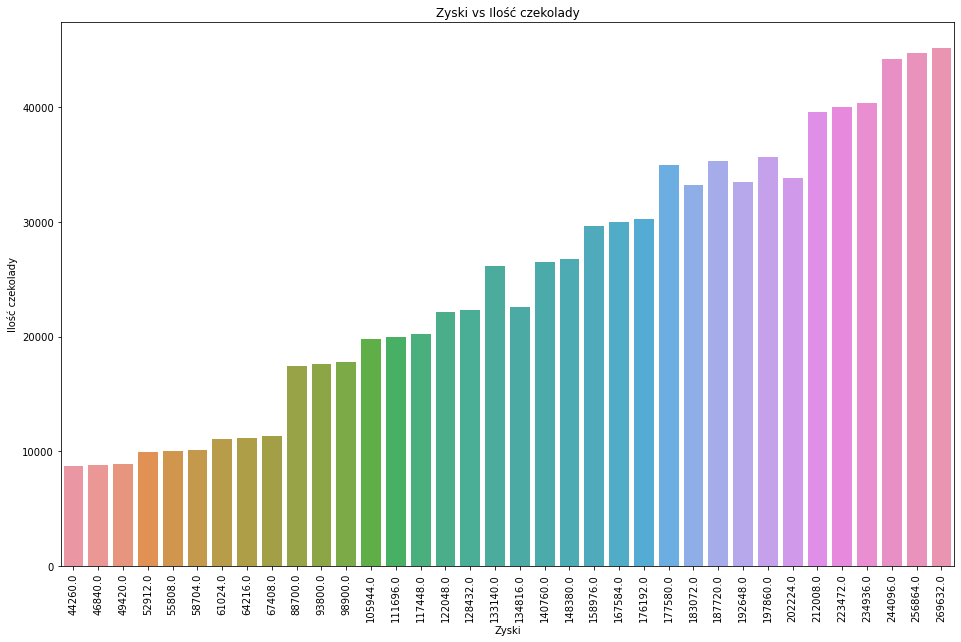

In [10]:
plt.figure(figsize=(16, 10))
plt.title("Zyski vs Ilość czekolady") 
plt.xlabel("Zyski")
plt.ylabel("Ilość czekolady")
plt.xticks(rotation=90)
sns.barplot(x= zyski,
            y= ilość_czekolady)

Jak możemy zauważyć na powyższym wykresie wyniki są bardzo progresywne. Wykres jest rosnący z czego wynika to, że możemy założyć, że zyski przedsiębiorstwa są wprost proporcjonalne do ilości wyprodukowanej czekolady. Potwierdza to nasze stwierdzenie, że najlepsze zyski uzyskamy przy maksymalnym korzystaniu z zasobów przedsiębiorstwa produkcyjnego.

In [12]:
pogrupowane = ostateczny_wynik.groupby(jakość_opakowania)

opakowanie_1 = pogrupowane.get_group(1)
opakowanie_1 = opakowanie_1.sort_values(by=["Zysk"], ascending=False)

opakowanie_2 = pogrupowane.get_group(2)
opakowanie_2 = opakowanie_2.sort_values(by=["Zysk"], ascending=False)

opakowanie_3 = pogrupowane.get_group(3)
opakowanie_3 = opakowanie_3.sort_values(by=["Zysk"], ascending=False)

In [13]:
opakowanie_1.head(n=1)

,Opakownie,Liczba konsz,Jakość ziaren,Ilość czekolady,Koszt produkcji,Zysk
27,1,4,1,45144.0,91520.0,269632.0


In [14]:
opakowanie_2.head(n=1)

,Opakownie,Liczba konsz,Jakość ziaren,Ilość czekolady,Koszt produkcji,Zysk
28,2,4,1,44688.0,100640.0,256864.0


In [15]:
opakowanie_3.head(n=1)

,Opakownie,Liczba konsz,Jakość ziaren,Ilość czekolady,Koszt produkcji,Zysk
29,3,4,1,44232.0,109760.0,244096.0


W celu osiągnięcia maksymalnego zysku, firma powinna wykorzystywać wszystkie 4 konsze. Dla opakowania najlepszego rodzaju, najbardziej optymalnym wyborem jest użycie ziaren z Dominikany. Dla reszty rodzajów opakowań również najbardziej optymalnym wyborem są ziarna z Dominikany, które zapewniają największy zysk manufakturze.

## Podsumowanie i wnioski

Przyjęto założenia, że producent czekolady Villy Vonka do produkcji czekolady korzysta z trzech opakowań różnej jakości, w swojej hali produkcyjnej posiada 4 konsze do mieszania czekolady i każda z nich mieści w sobie jej 200 litrów, a koszt utrzymania każdej z nich wynosi 20 tys. zł i do wytworzenia 1 tabliczki potrzebny jest jeden list czekolady. Przedsiębiorstwo Villy Vonka, aby utrzymywać najwyższe zyski oraz najbardziej optymalne koszty produkcji powinno swoją produkcję nakierować na wytwarzanie tabliczek czekolady z ziaren z Dominikany, powinno używać się najlepszego rodzaju opakowań oraz wykorzystywać maksymalnie możliwości produkcyjne.
Z powyższej analizy wynika również, żeby korzystać ze wszystkich konsz. Mimo ich wysokich kosztów eksploatacji najwięcej zyskamy korzystając z co najmniej 4 konsz, nie mniej niż 3 konsz.
Zastosowanie się do tych rekomendacji, pozwoli przedsiębiorstwu Villy Vonka na maksymalizację zysku w zależności od dostępności poszczególnych składowych niezbędnych do wytworzenia produktu końcowego.